# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
  import pandas as pd
  import seaborn as sns
  import numpy as np
  import matplotlib.pyplot as plt
  import io
  from yellowbrick.cluster import KElbowVisualizer
  from sklearn.cluster import KMeans, DBSCAN
  from sklearn.metrics import silhouette_score
  from sklearn.preprocessing import LabelEncoder, StandardScaler
  from sklearn.decomposition import PCA
  from sklearn.compose import ColumnTransformer
  from sklearn.pipeline import Pipeline
  from google.colab import files
  from sklearn.preprocessing import MinMaxScaler
  from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Upload file
dataset = files.upload()

# Pastikan file yang diupload sesuai dengan nama file yang Anda miliki
file_name = list(dataset.keys())[0]  # Ambil nama file pertama yang diupload
df = pd.read_csv(io.BytesIO(dataset[file_name]))  # Baca dataset

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print(df.head())  # Menampilkan semua kolom terlebih dahulu

Saving crime_vs_socioeconomic_factors.csv to crime_vs_socioeconomic_factors.csv
     Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
0  Region_1        1176        76.492001        73.315344         116664   
1  Region_2         910        85.361505        46.088096          21401   
2  Region_3        1344        88.388975        63.911701         105179   
3  Region_4        1180        54.364509        65.305378          35193   
4  Region_5        1145        75.305198        51.627568         112389   

   Poverty_Rate  Population_Density  
0     14.655300                1523  
1     19.712623                3293  
2      9.634319                4528  
3     19.994283                2231  
4     26.537843                1499  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (1000, 7)

Tipe data per kolom:
 Region                 object
Crime_Rate              int64
Education_Level       float64
Employment_Rate       float64
Median_Income           int64
Poverty_Rate          float64
Population_Density      int64
dtype: object

Contoh data:
      Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
0  Region_1        1176        76.492001        73.315344         116664   
1  Region_2         910        85.361505        46.088096          21401   
2  Region_3        1344        88.388975        63.911701         105179   
3  Region_4        1180        54.364509        65.305378          35193   
4  Region_5        1145        75.305198        51.627568         112389   

   Poverty_Rate  Population_Density  
0     14.655300                1523  
1     19.712623                3293  
2      9.634319                4528  
3     19.994283                2231  
4     26.537843                1499  

Jumlah missing val

<Figure size 1400x1000 with 0 Axes>

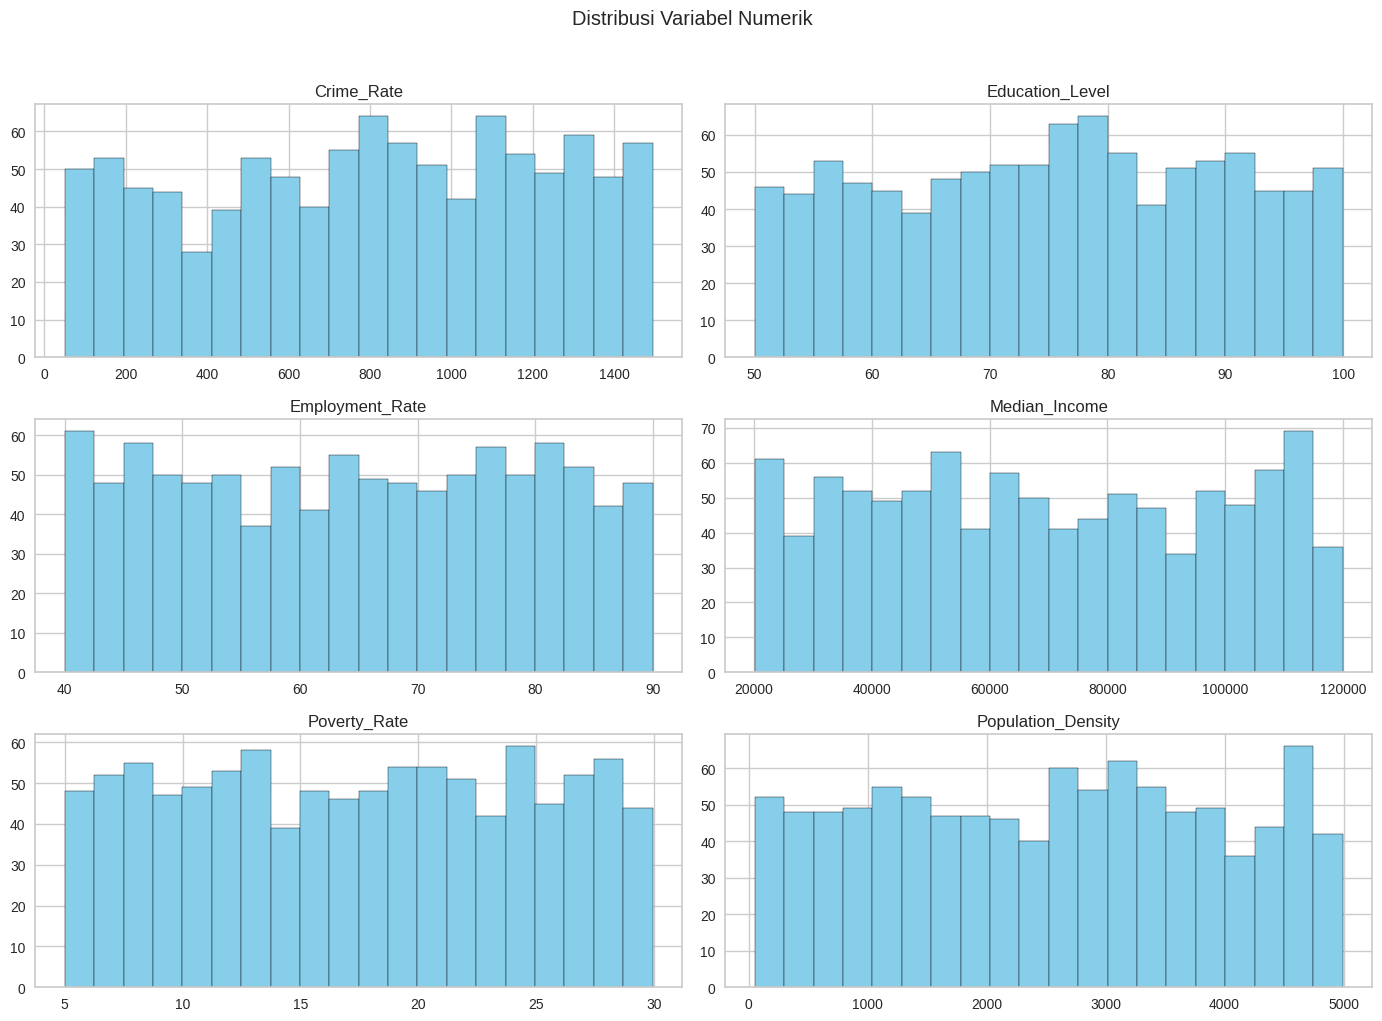

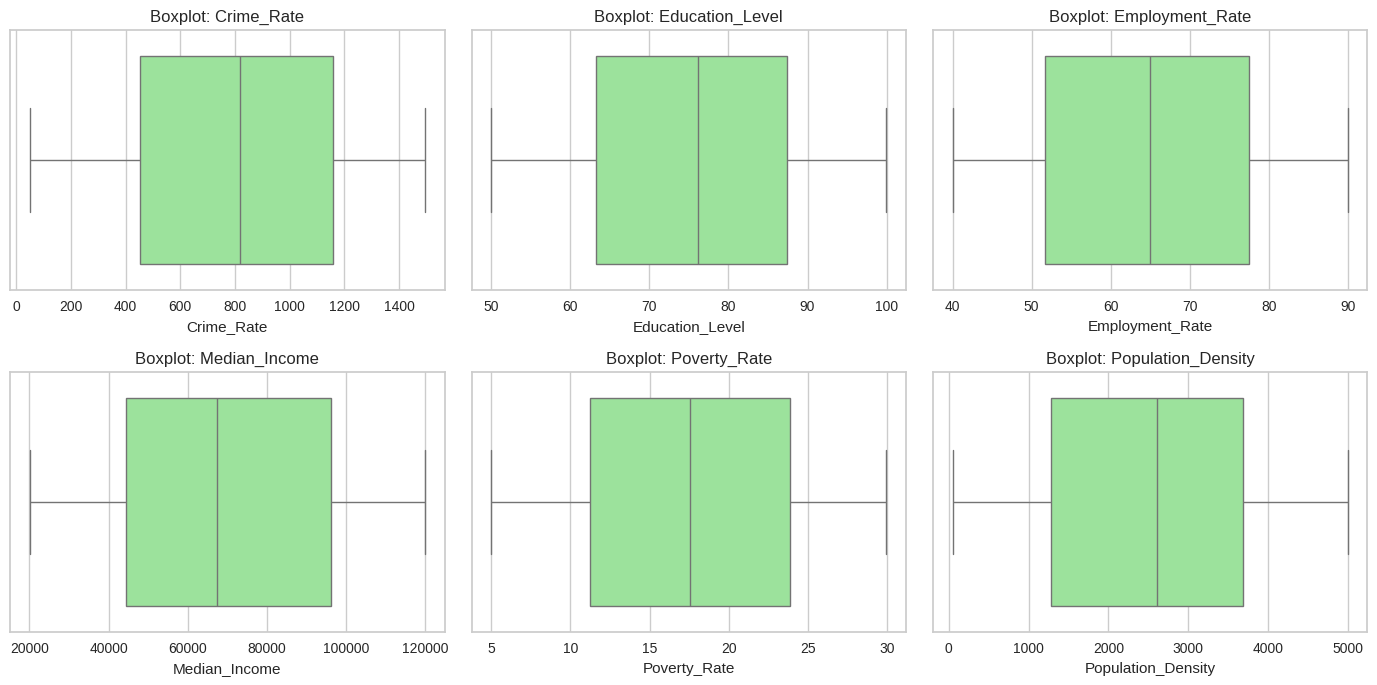

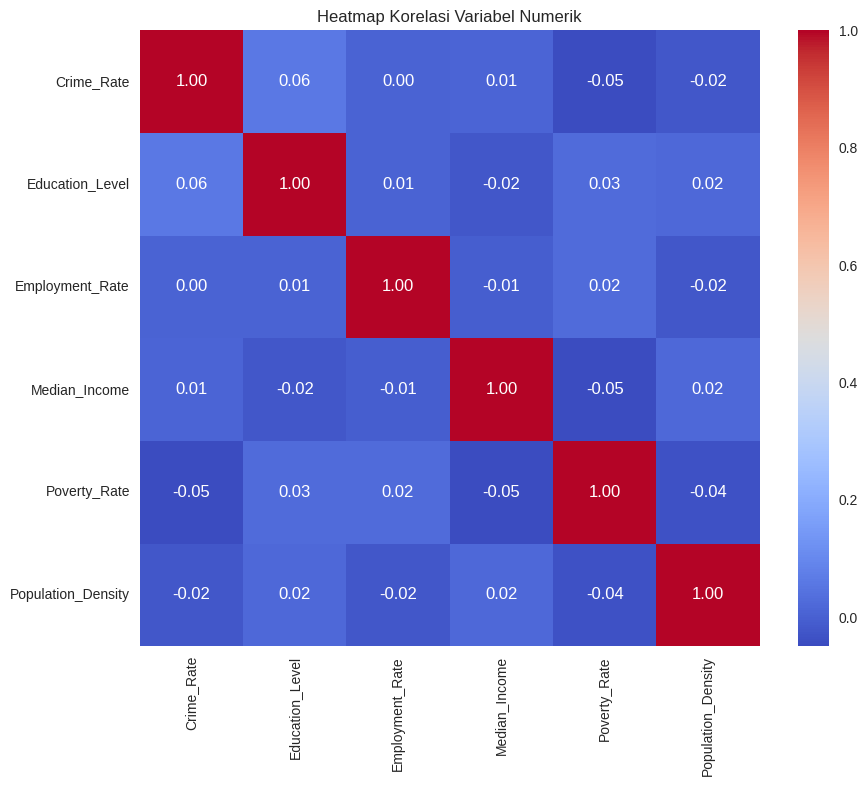

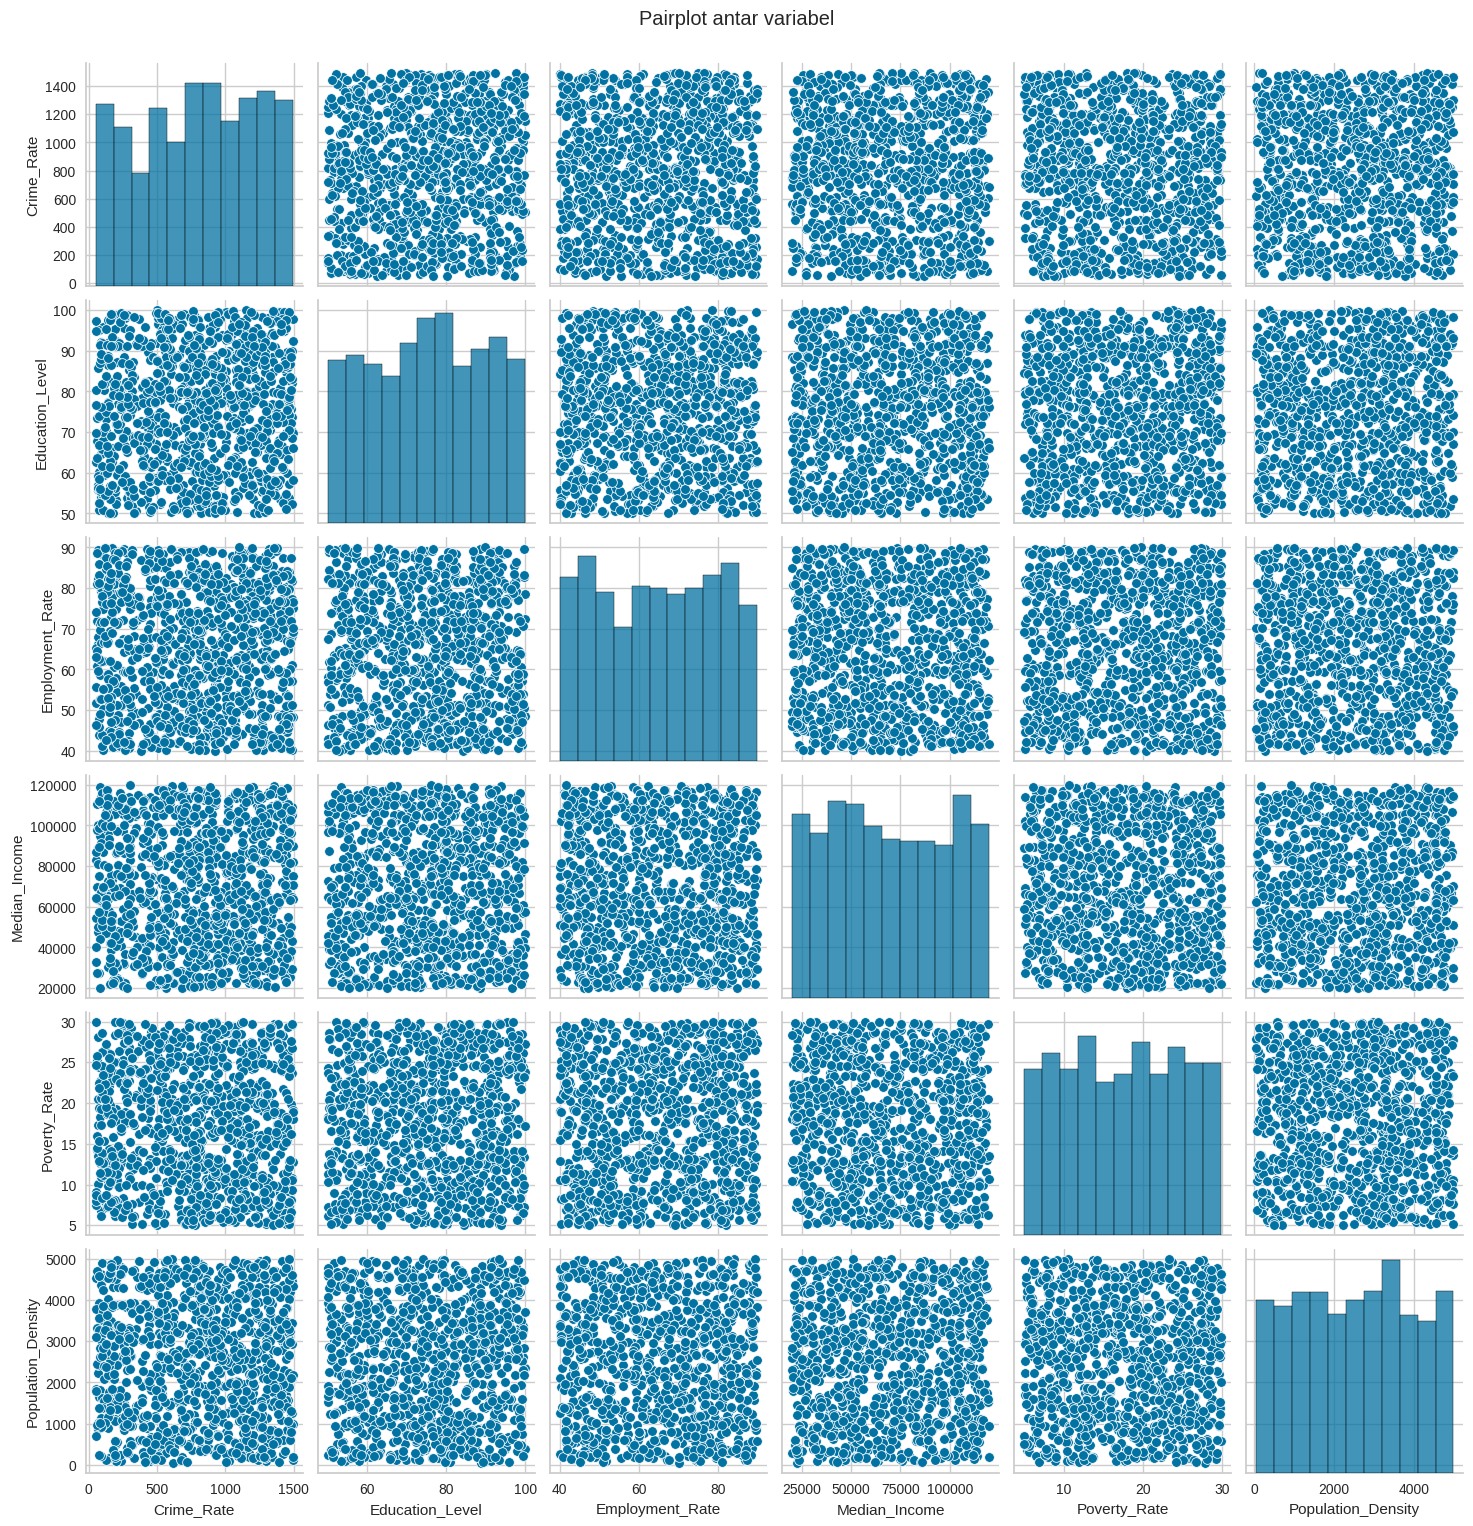

In [3]:
# 1. Struktur Data
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data per kolom:\n", df.dtypes)
print("\nContoh data:\n", df.head())

# 2. Cek Missing Values
print("\nJumlah missing values per kolom:\n", df.isnull().sum())

# 3. Statistik Deskriptif
print("\nStatistik deskriptif:\n", df.describe())

# 4. Visualisasi Distribusi Variabel Numerik (Histogram)
plt.figure(figsize=(14, 10))
df.select_dtypes(include=['float64', 'int64']).hist(
    bins=20, edgecolor='black', color='skyblue', figsize=(14, 10))
plt.suptitle("Distribusi Variabel Numerik", y=1.02)
plt.tight_layout()
plt.show()

# 5. Boxplot untuk mendeteksi Outlier
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color="lightgreen")
    plt.title(f"Boxplot: {column}")
plt.tight_layout()
plt.show()

# 6. Korelasi antar Variabel (Heatmap)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# 7. Pairplot untuk melihat hubungan antar variabel
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Pairplot antar variabel", y=1.02)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
# 1. Menghapus atau Menangani Missing Values
# (dataset kamu sebelumnya tidak ada missing values, tapi tetap kita periksa ulang)
df = df.dropna()  # atau bisa gunakan df.fillna() jika ingin imputasi

# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

# 3. Deteksi dan Penanganan Outlier (menggunakan IQR)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# 4. Encoding Kolom Kategorikal (Region)
label_encoder = LabelEncoder()
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])

# 5. Normalisasi / Standarisasi Fitur Numerik
scaler = StandardScaler()  # atau MinMaxScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)

# Gabungkan hasil scaling dan encoding ke dataframe akhir
df_final = pd.concat([df_scaled, df['Region_encoded']], axis=1)

# 6. (Opsional) Binning contoh: kelompokkan Crime_Rate menjadi kategori
crime_bins = [0, 800, 1200, df['Crime_Rate'].max()]
crime_labels = ['Low', 'Medium', 'High']
df_final['Crime_Level'] = pd.cut(df['Crime_Rate'], bins=crime_bins, labels=crime_labels)

# Tampilkan data hasil preprocessing
print("\nData setelah preprocessing:\n")
print(df_final.head())



Data setelah preprocessing:

   Crime_Rate  Education_Level  Employment_Rate  Median_Income  Poverty_Rate  \
0    0.893762         0.078006         0.580021       1.617429     -0.389119   
1    0.257363         0.706441        -1.279117      -1.644509      0.311062   
2    1.295698         0.920947        -0.062081       1.224167     -1.084268   
3    0.903332        -1.489802         0.033083      -1.172252      0.350058   
4    0.819595        -0.006083        -0.900869       1.471047      1.256006   

   Population_Density  Region_encoded Crime_Level  
0           -0.702323               0      Medium  
1            0.549349             112      Medium  
2            1.422691             223        High  
3           -0.201654             334      Medium  
4           -0.719295             445      Medium  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

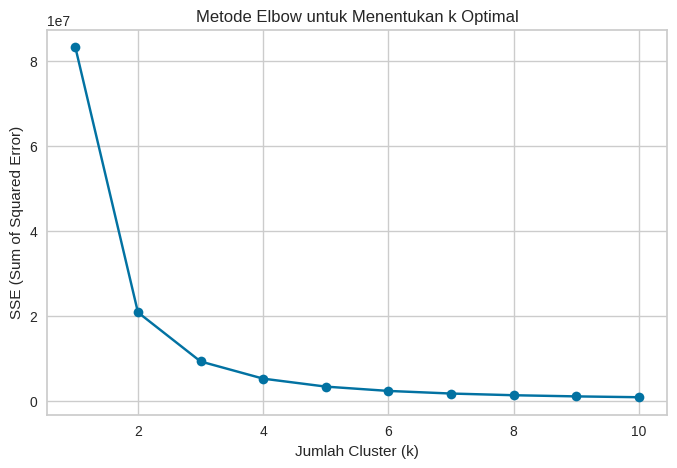

Cluster
1          334
0          333
2          333
Name: count, dtype: int64
   Crime_Rate  Education_Level  Employment_Rate  Median_Income  Poverty_Rate  \
0    0.893762         0.078006         0.580021       1.617429     -0.389119   
1    0.257363         0.706441        -1.279117      -1.644509      0.311062   
2    1.295698         0.920947        -0.062081       1.224167     -1.084268   
3    0.903332        -1.489802         0.033083      -1.172252      0.350058   
4    0.819595        -0.006083        -0.900869       1.471047      1.256006   

   Population_Density  Region_encoded Crime_Level  Cluster  
0           -0.702323               0      Medium        1  
1            0.549349             112      Medium        1  
2            1.422691             223        High        1  
3           -0.201654             334      Medium        2  
4           -0.719295             445      Medium        2  


In [5]:
# 1. Ambil fitur numerik untuk clustering (tanpa label atau kolom kategorikal)
X = df_final.drop(columns=['Crime_Level'], errors='ignore')  # buang kolom binning jika ada

# 2. Gunakan Elbow Method untuk menentukan jumlah cluster optimal
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 3. Visualisasi Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, sse, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Sum of Squared Error)')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

# 4. Melatih model KMeans dengan jumlah cluster optimal (misalnya k = 3)
k_optimal = 3  # Ganti ini sesuai hasil elbow
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_final['Cluster'] = kmeans_model.fit_predict(X)

# 5. Tampilkan hasil klaster untuk beberapa baris
print(df_final[['Cluster']].value_counts())
print(df_final.head())

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


=== Daftar Kolom yang Tersedia ===
['Region', 'Crime_Rate', 'Education_Level', 'Employment_Rate', 'Median_Income', 'Poverty_Rate', 'Population_Density', 'Region_encoded']

=== Cek Missing Values ===
Crime_Rate            0
Education_Level       0
Employment_Rate       0
Median_Income         0
Poverty_Rate          0
Population_Density    0
dtype: int64

=== Silhouette Score ===
Score: 0.1192


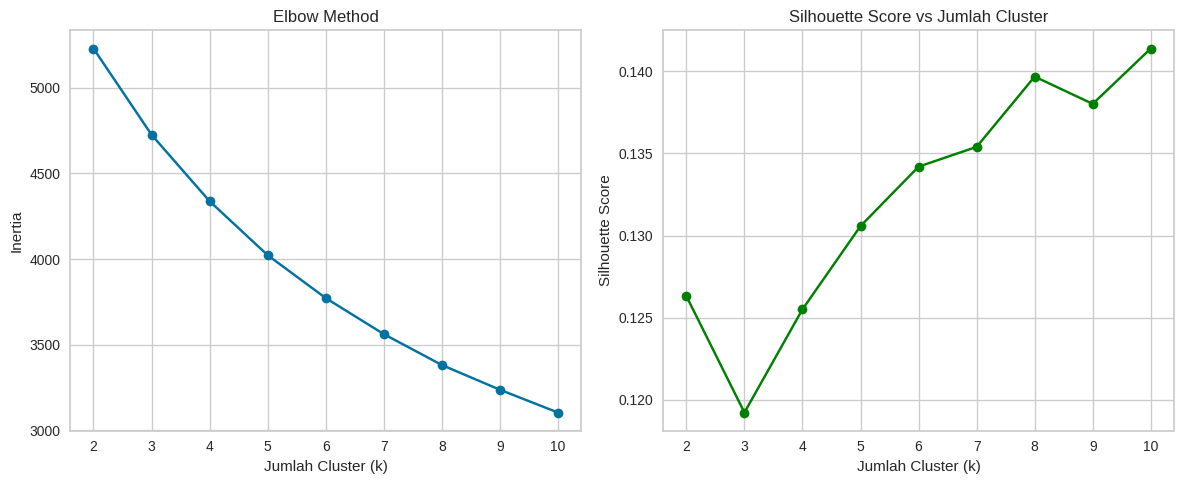


=== Distribusi per Cluster ===
Cluster
1    339
2    336
0    325
Name: count, dtype: int64

=== Rata-rata Tiap Fitur per Cluster ===
          Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
Cluster                                                                 
0        1104.298462        75.702417        64.875233   83528.526154   
1         350.672566        72.766734        66.068650   76796.731563   
2         966.229167        77.737631        63.509396   48354.354167   

         Poverty_Rate  Population_Density  
Cluster                                    
0           12.164888         2776.080000  
1           17.717694         2592.510324  
2           22.339204         2187.720238  

=== Contoh Data ===
     Region  Crime_Rate  Poverty_Rate  Cluster
0  Region_1      1176.0     14.655300        0
1  Region_2       910.0     19.712623        2
2  Region_3      1344.0      9.634319        0
3  Region_4      1180.0     19.994283        2
4  Region_5      1145.0

In [6]:
# 1. Tampilkan semua kolom untuk memilih fitur clustering
print("\n=== Daftar Kolom yang Tersedia ===")
print(df.columns.tolist())

# 2. Pilih fitur numerik yang tersedia untuk clustering
# (Sesuaikan berdasarkan isi dataset kamu)
# 1. Gunakan hanya kolom numerik
features = ['Crime_Rate', 'Education_Level', 'Employment_Rate',
            'Median_Income', 'Poverty_Rate', 'Population_Density']

# 2. Ambil data fitur numerik
X = df[features]

# 3. Tangani missing value
print("\n=== Cek Missing Values ===")
print(X.isna().sum())

for col in features:
    if X[col].isna().sum() > 0:
        X[col].fillna(X[col].median(), inplace=True)
        print(f"NaN pada kolom {col} diisi dengan median.")

# 4. Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Clustering dengan KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Evaluasi clustering
score = silhouette_score(X_scaled, df['Cluster'])
print(f"\n=== Silhouette Score ===\nScore: {score:.4f}")

#  Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_tmp.fit_predict(X_scaled)
    inertia.append(kmeans_tmp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

#  Visualisasi Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

#  Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# 8. Analisis hasil klaster
df[features] = scaler.inverse_transform(X_scaled)

print("\n=== Distribusi per Cluster ===")
print(df['Cluster'].value_counts())

print("\n=== Rata-rata Tiap Fitur per Cluster ===")
print(df.groupby('Cluster')[features].mean())

print("\n=== Contoh Data ===")
print(df[['Region', 'Crime_Rate', 'Poverty_Rate', 'Cluster']].head())


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-8-9ec88808f7cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
<ipython-input-8-9ec88808f7cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
<ipython-input-8-9ec88808f7cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
<ipython-input-8-9ec88808f7cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

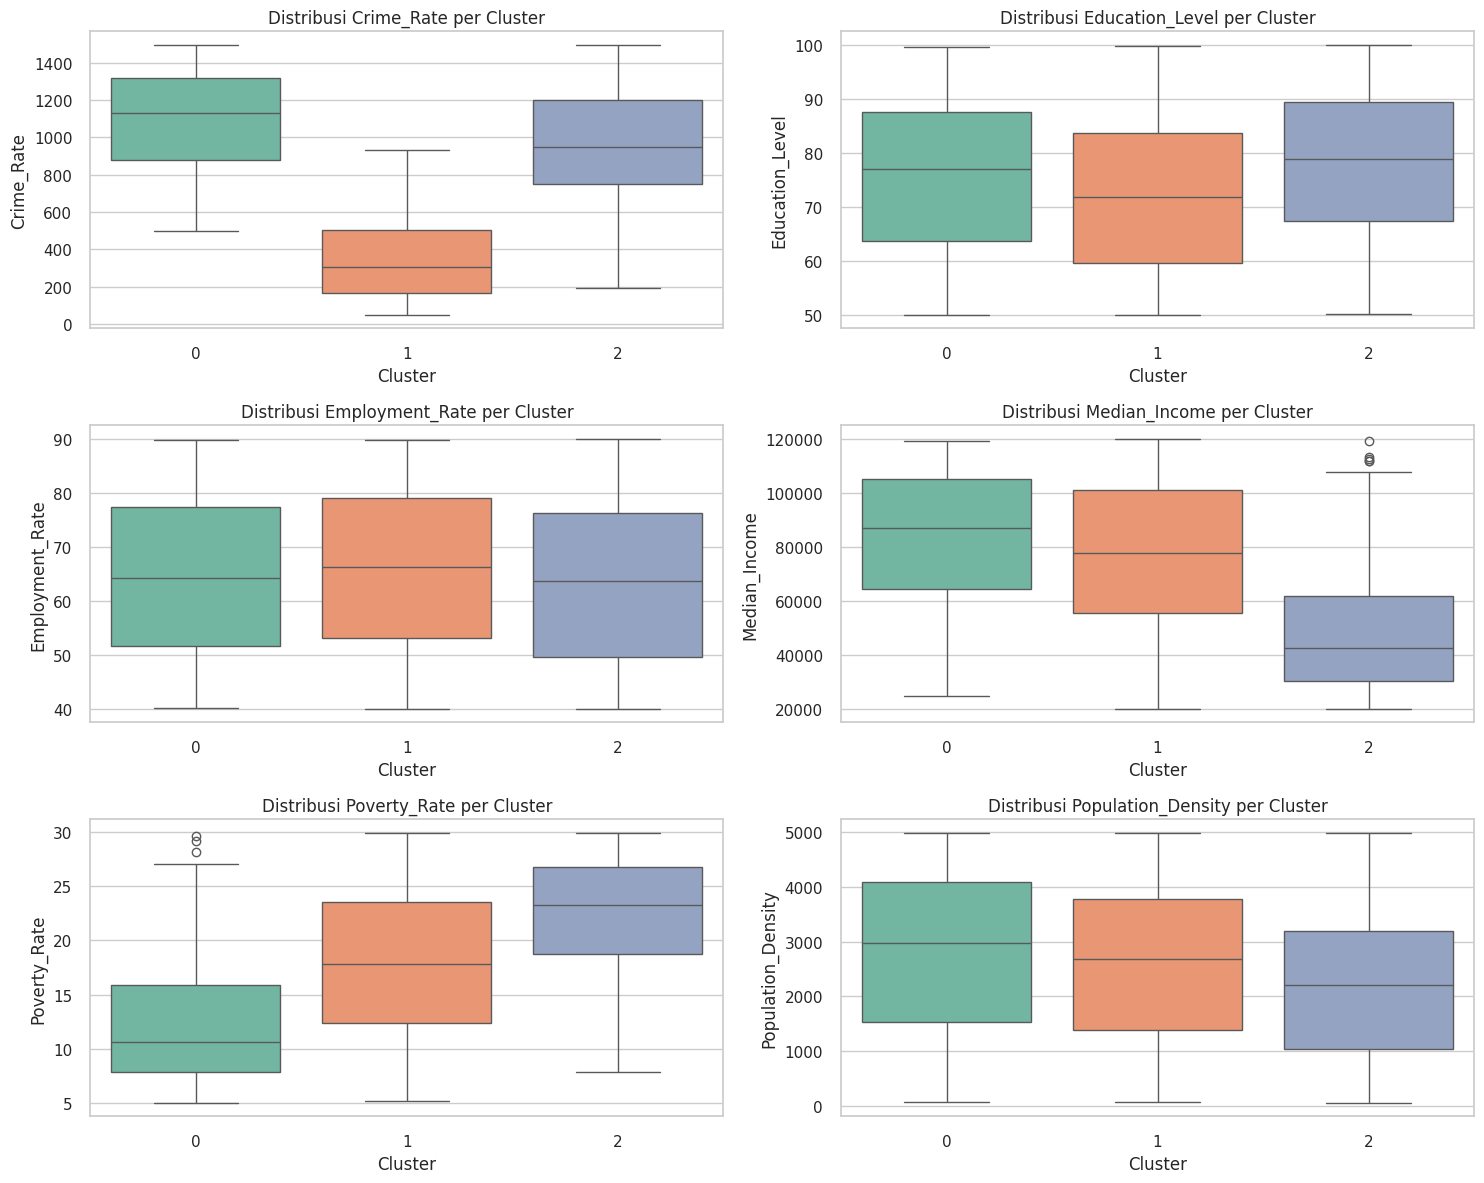

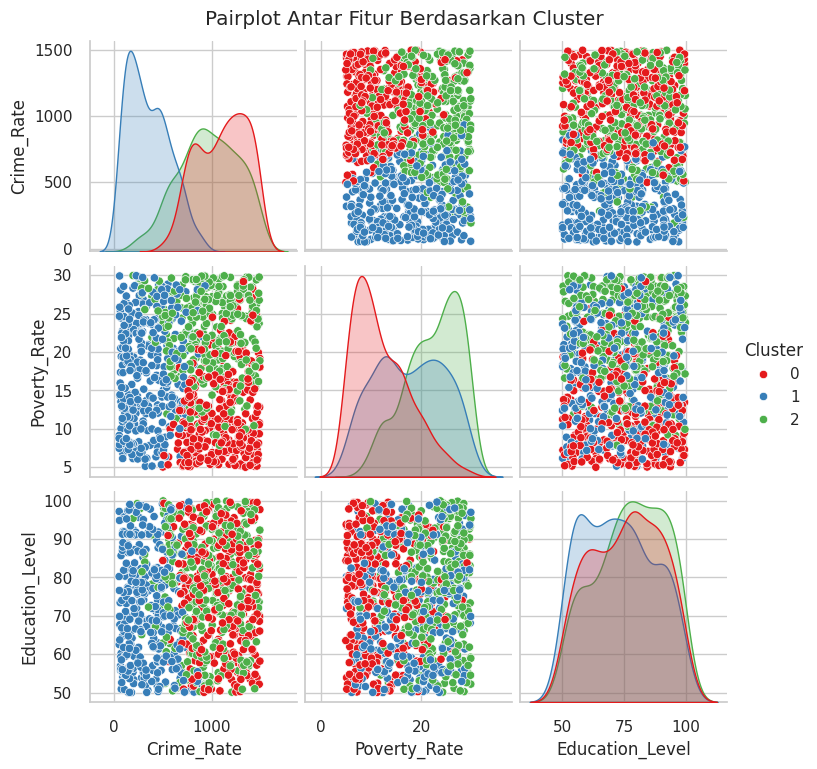

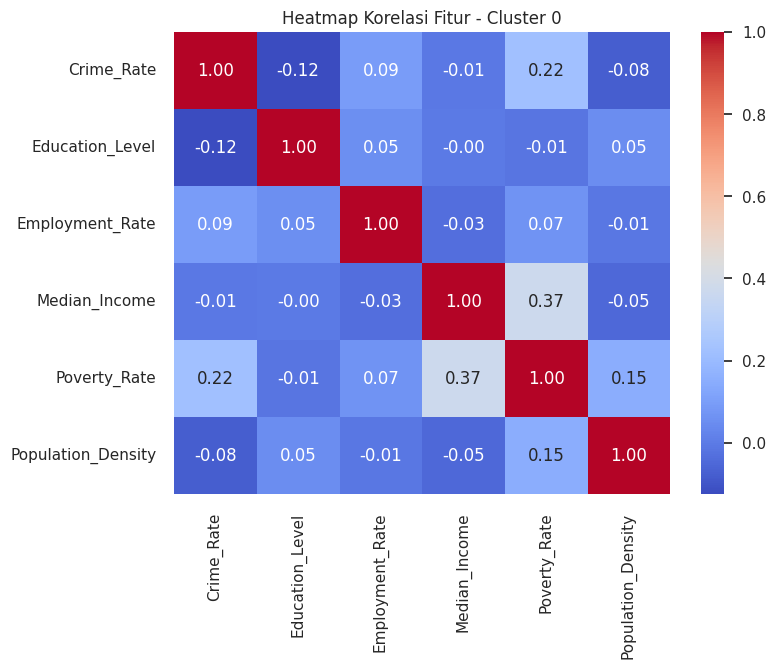

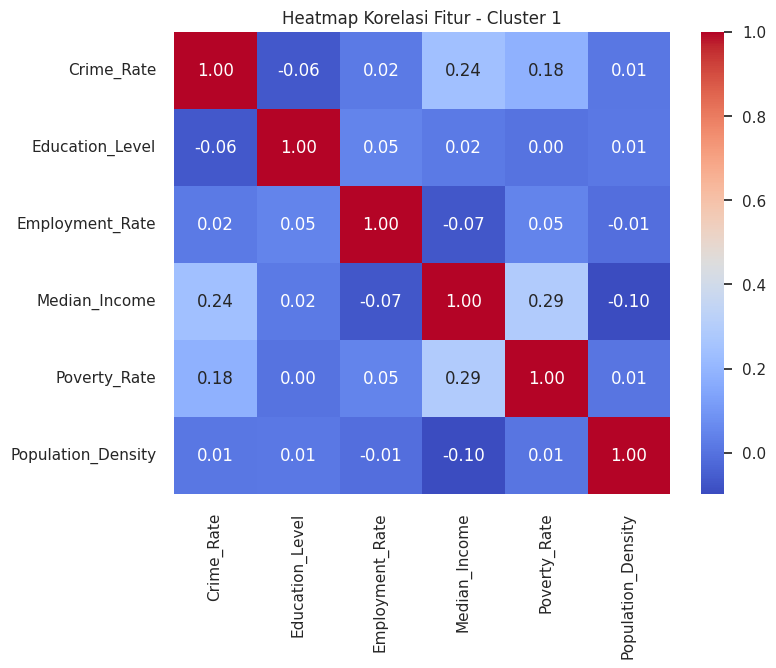

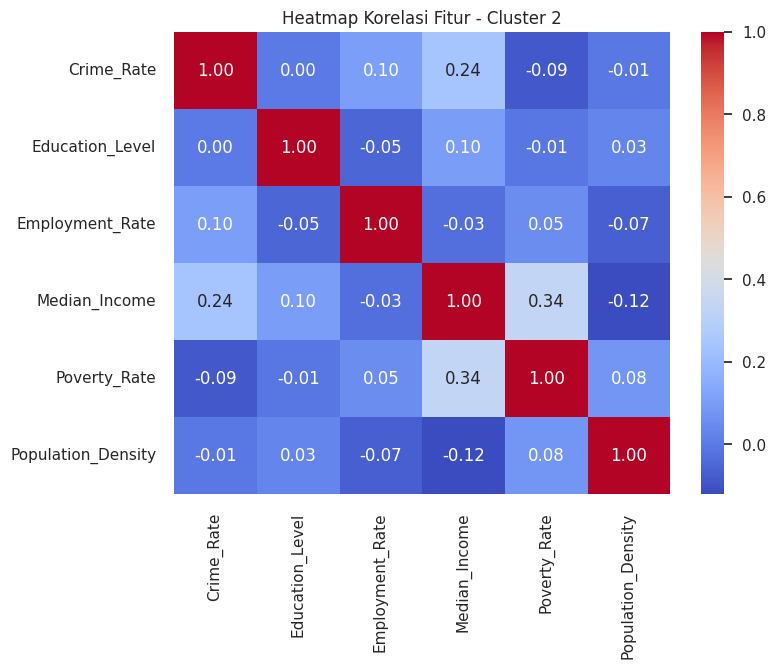

In [8]:
# Set style untuk visual
sns.set(style="whitegrid")

# Pastikan df sudah berisi data dan kolom 'Cluster' sudah ada
features = ['Crime_Rate', 'Education_Level', 'Employment_Rate',
            'Median_Income', 'Poverty_Rate', 'Population_Density']
# ======================================
# 1. Boxplot Distribusi Fitur per Cluster
# ======================================
plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
    plt.title(f'Distribusi {col} per Cluster')
    plt.tight_layout()
plt.show()

# ======================================
# 2. Pairplot Antar Fitur Berdasarkan Cluster
# ======================================
subset_features = ['Crime_Rate', 'Poverty_Rate', 'Education_Level', 'Cluster']
sns.pairplot(df[subset_features], hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot Antar Fitur Berdasarkan Cluster", y=1.02)
plt.show()

# ======================================
# 3. Heatmap Korelasi Antar Fitur per Cluster
# ======================================
for c in sorted(df['Cluster'].unique()):
    plt.figure(figsize=(8, 6))
    cluster_data = df[df['Cluster'] == c][features]
    sns.heatmap(cluster_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Heatmap Korelasi Fitur - Cluster {c}")
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [9]:
# Misalnya df adalah dataframe asli sebelum normalisasi
df_normalized = pd.DataFrame(X_scaled, columns=features)

# Tambahkan label cluster
df_normalized['Cluster'] = kmeans.labels_

# Inverse transform numerik (balikin ke data asli sebelum dinormalisasi)
df_original_values = pd.DataFrame(
    scaler.inverse_transform(df_normalized[features]),
    columns=features
)

# Tambahkan label cluster ke hasil inverse
df_original_values['Cluster'] = df_normalized['Cluster']

# Jika ada Region_encoded (label encoding), kembalikan ke Region asli
if 'Region_encoded' in df.columns:
    df_original_values['Region'] = label_encoder.inverse_transform(df['Region_encoded'])

# Tampilkan hasil
print(df_original_values.head())


   Crime_Rate  Education_Level  Employment_Rate  Median_Income  Poverty_Rate  \
0      1176.0        76.492001        73.315344       116664.0     14.655300   
1       910.0        85.361505        46.088096        21401.0     19.712623   
2      1344.0        88.388975        63.911701       105179.0      9.634319   
3      1180.0        54.364509        65.305378        35193.0     19.994283   
4      1145.0        75.305198        51.627568       112389.0     26.537843   

   Population_Density  Cluster    Region  
0              1523.0        0  Region_1  
1              3293.0        2  Region_2  
2              4528.0        0  Region_3  
3              2231.0        2  Region_4  
4              1499.0        2  Region_5  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

=== Rata-Rata Nilai Tiap Fitur per Cluster ===
          Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
Cluster                                                                 
0        1104.298462        75.702417        64.875233   83528.526154   
1         350.672566        72.766734        66.068650   76796.731563   
2         966.229167        77.737631        63.509396   48354.354167   

         Poverty_Rate  Population_Density  
Cluster                                    
0           12.164888         2776.080000  
1           17.717694         2592.510324  
2           22.339204         2187.720238  

=== Jumlah Data per Cluster ===
Cluster
1    339
2    336
0    325
Name: count, dtype: int64


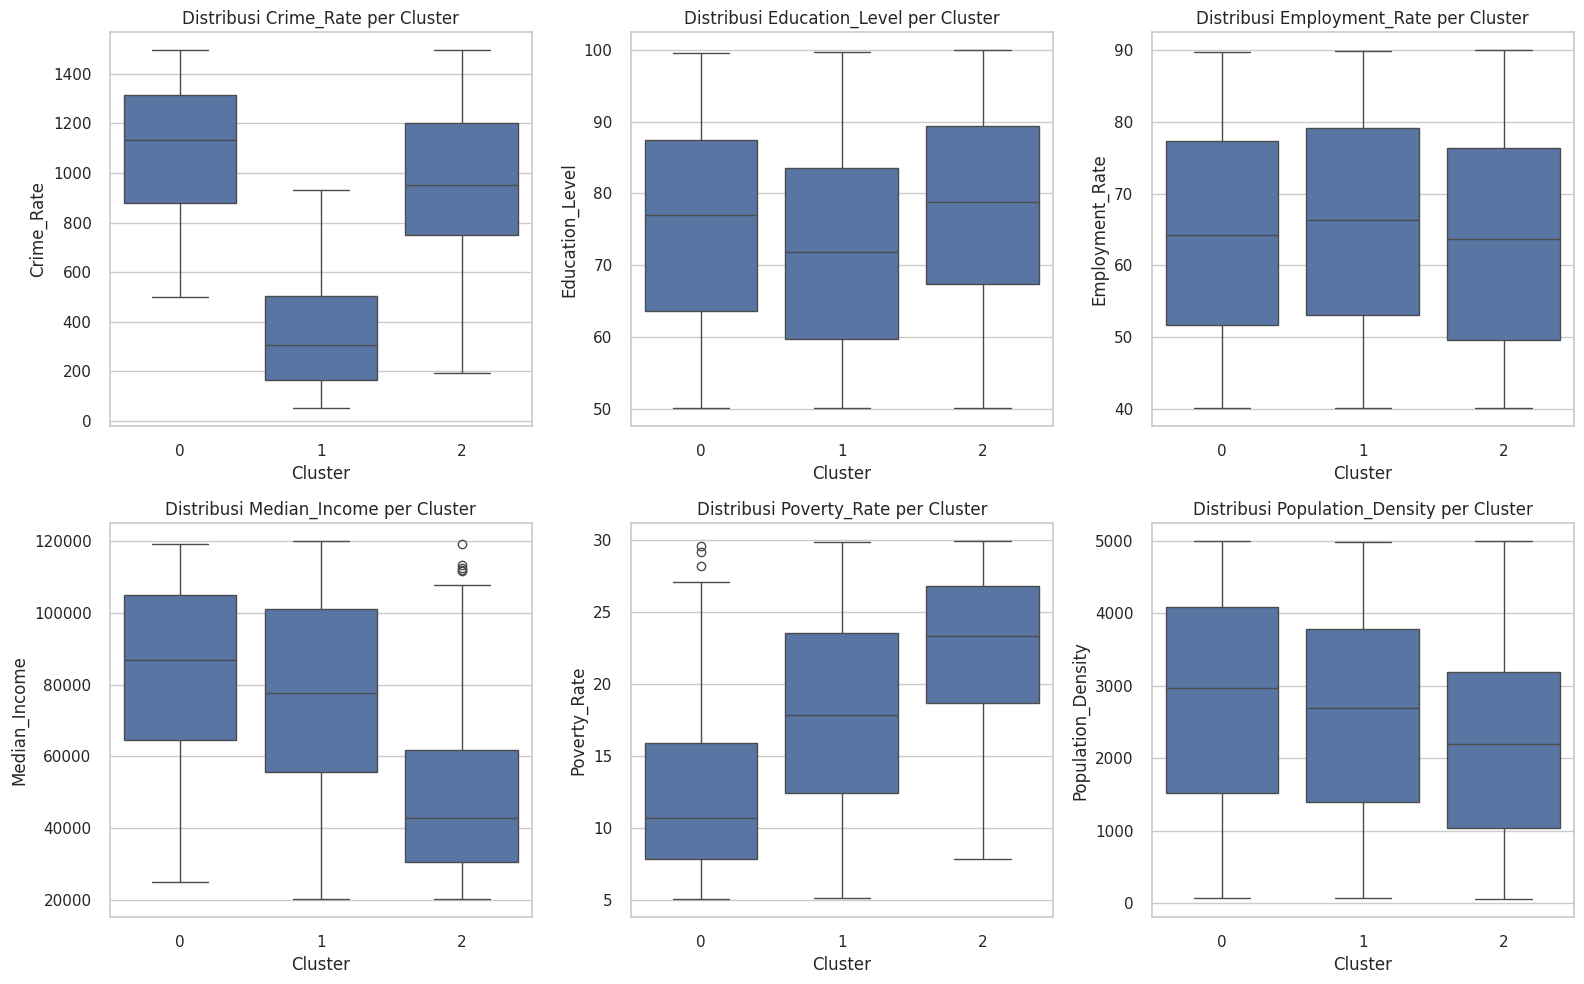

In [10]:
# === Analisis Karakteristik Tiap Cluster Berdasarkan Data Asli ===
# 1. Buat df_normalized dari hasil standarisasi
df_normalized = pd.DataFrame(X_scaled, columns=features)

# 2. Tambahkan label cluster ke df_normalized
df_normalized['Cluster'] = kmeans.labels_

# 3. Lakukan inverse transform untuk mengembalikan ke data asli
df_original_values = pd.DataFrame(
    scaler.inverse_transform(df_normalized[features]),
    columns=features
)

# 4. Tambahkan label cluster ke data asli
df_original_values['Cluster'] = df_normalized['Cluster']

# 5. Jika sebelumnya ada kolom kategorikal yang diencode (misalnya Region), tambahkan kembali
if 'Region_encoded' in df.columns:
    df_original_values['Region'] = label_encoder.inverse_transform(df['Region_encoded'])

# 6. Analisis karakteristik setiap cluster
summary_by_cluster = df_original_values.groupby('Cluster')[features].mean()

print("=== Rata-Rata Nilai Tiap Fitur per Cluster ===")
print(summary_by_cluster)

# 7. Tambahan: Tampilkan jumlah data per cluster
print("\n=== Jumlah Data per Cluster ===")
print(df_original_values['Cluster'].value_counts())

# 8. Tambahan: Distribusi fitur dalam bentuk boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, int(len(features)/2 + 0.5), i + 1)
    sns.boxplot(data=df_original_values, x='Cluster', y=col)
    plt.title(f'Distribusi {col} per Cluster')
    plt.tight_layout()
plt.show()


Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

Cluster 0:
- **Rata-rata Crime Rate: 1104.30
- **Rata-rata Education Level: 75.70
- **Rata-rata Employment Rate: 64.88
- **Rata-rata Median Income: $83,528
- **Rata-rata Poverty Rate: 12.16
- **Rata-rata Population Density: 2776 orang/km²
- **Analisis:** Cluster ini merepresentasikan wilayah dengan pendidikan dan pendapatan yang tinggi, serta tingkat kemiskinan dan kriminalitas yang relatif rendah dibandingkan cluster lainnya. Employment Rate-nya cukup baik meskipun tidak paling tinggi. Dengan populasi padat dan indikator sosial-ekonomi yang stabil, wilayah dalam cluster ini cocok sebagai prioritas pembangunan ekonomi dan sosial berkelanjutan, serta lokasi strategis untuk investasi atau pengembangan wilayah perkotaan.

Cluster 1:
- **Rata-rata Crime Rate: 350.67
- **Rata-rata Education Level: 72.77
- **Rata-rata Employment Rate: 66.07
- **Rata-rata Median Income: $76,797
- **Rata-rata Poverty Rate: 17.72
- **Rata-rata Population Density: 2592.51 orang/km²
- **Analisis:** Cluster ini menunjukkan wilayah dengan indikator sosial ekonomi yang cukup seimbang. Crime Rate-nya paling rendah di antara semua cluster, namun angka kemiskinan masih tergolong sedang. Dengan tingkat pendidikan dan pendapatan yang baik, cluster ini bisa menjadi wilayah stabil secara sosial dan ekonomi serta potensial untuk pengembangan jangka menengah, namun perlu perhatian terhadap aspek kemiskinan.

Cluster 2:
- **Rata-rata Crime Rate: 966.23
- **Rata-rata Education Level: 77.74
- **Rata-rata Employment Rate: 63.51
- **Rata-rata Median Income: $48,354
- **Rata-rata Poverty Rate: 22.34
- **Rata-rata Population Density: 2187.72 orang/km²
- **Analisis:** Cluster ini memiliki education level tertinggi, namun tetap disertai dengan tingkat kemiskinan yang paling tinggi dan pendapatan paling rendah. Employment rate-nya juga paling rendah. Hal ini menunjukkan adanya kemungkinan ketimpangan akses terhadap peluang kerja meskipun pendidikannya tinggi. Wilayah ini cocok untuk dijadikan target program pemberdayaan ekonomi, pelatihan kerja, dan peningkatan infrastruktur ekonomi lokal.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [11]:
# Simpan DataFrame ke file CSV
df.to_csv('Dataset_inisiasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_inisiasi.csv'")

Data telah diekspor ke 'Dataset_inisiasi.csv'
